In [1]:
%reload_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%matplotlib inline
  
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# the following cells will use the rai framework for robot control, simulation and motion planning
# https://github.com/MarcToussaint/rai
import sys
import os 
print(os.getcwd())
# add the folder where libry.so is located to the path. Otherwise the import will crash.
sys.path.append('../../ry/')
sys.path.append('../../')
sys.path.append('../')
import libry as ry
import time
import gc
import os
from collections import defaultdict
import utils

# add simulation. Note: if the string argument is not an empty string, a ROS node is started
# and the joint state topics of the real baxter are subscribed. This won't work if you can't connect to Baxter.
# In order to connect to Baxter, uncomment the next 2 lines and set the correct IP address:
#os.environ["ROS_MASTER_URI"] = "http://thecount.local:11311/"
#os.environ["ROS_IP"] = "129.69.216.204"

/home/marc/git/uni/robotics-course/practical/clean


In [3]:
from webserver import sampleClient
import vision
import cv2
from skimage import measure, morphology

In [4]:
cam = ry.Camera("camMarc", "/camera/color/image_raw", "/camera/depth/image_rect_raw", True)

In [5]:
img = cam.getRgb()
d = cam.getDepth()

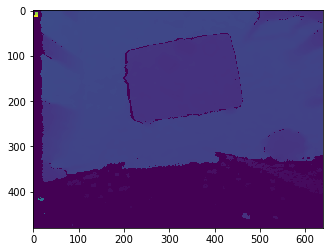

In [6]:
plt.imshow(d)

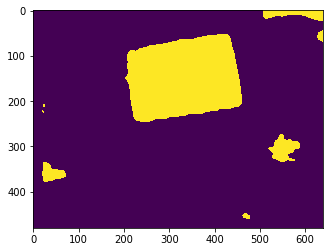

In [7]:
dm, m = vision.maskDepth(d, 1.,1.3 )
m = cv2.medianBlur(m.astype(np.uint8), 5)
plt.imshow(m)

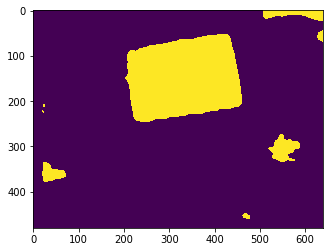

In [12]:
lbl = morphology.label(m, connectivity=2)
props = measure.regionprops(lbl)
img_1 = img.copy()
for prop in props:
    cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)
plt.imshow(m)

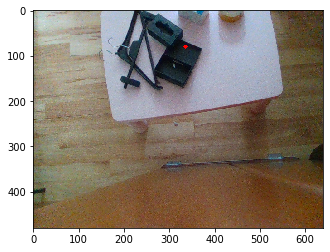

In [17]:
grasp = sampleClient.predictGQCNN(img, d, host="http://localhost:5000", segmask=m)
vision.plotCircleAroundCenter(img, grasp["x"], grasp["y"])

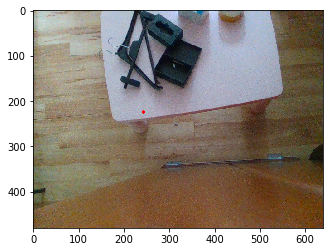

In [15]:
grasp = sampleClient.predictFCGQCNN(img, d, m,host="http://localhost:5000")
vision.plotCircleAroundCenter(img, grasp["x"], grasp["y"])

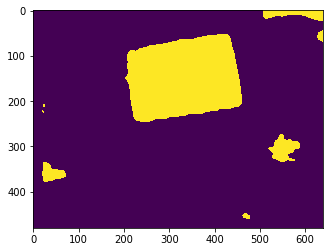

In [16]:
plt.imshow(m)